In [22]:
import pandas as pd
trains = pd.read_csv('route_802.csv')
print(trains.head())

   id   timestamp  vehicle_id  route_id        lat         lon  direction
0   1  1531904788         215       802  34.056198 -118.234249       90.0
1   2  1531905072         214       802  34.142859 -118.361947      270.0
2   3  1531905072         217       802  34.101764 -118.303253       90.0
3   4  1531905072         216       802  34.048634 -118.258682       90.0
4   5  1531905072         219       802  34.058477 -118.278217      270.0


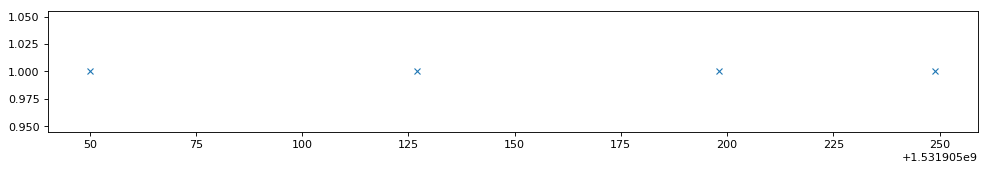

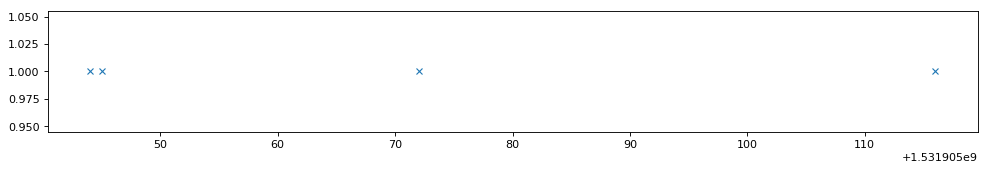

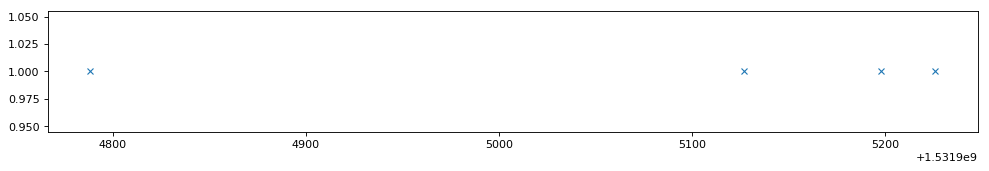

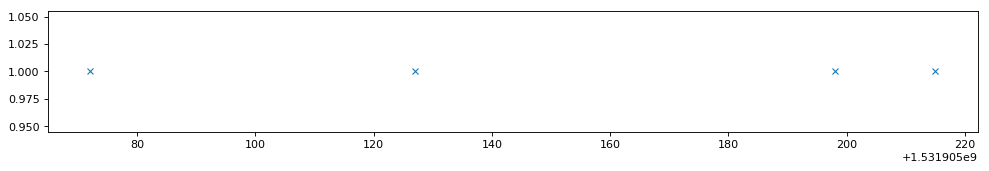

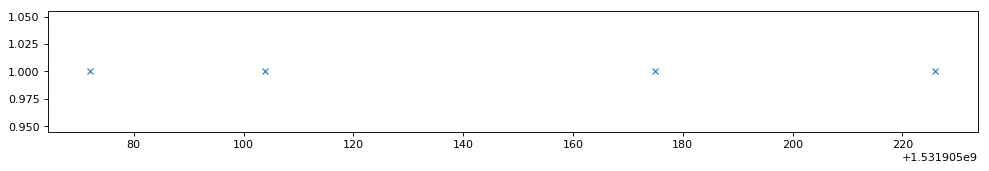

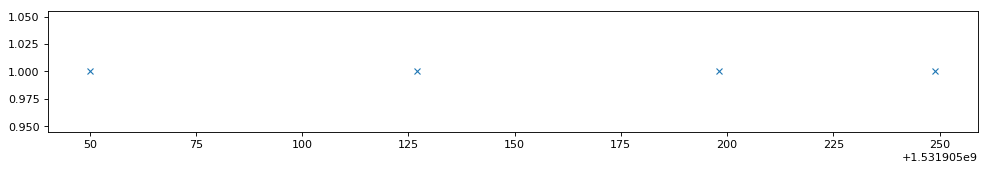

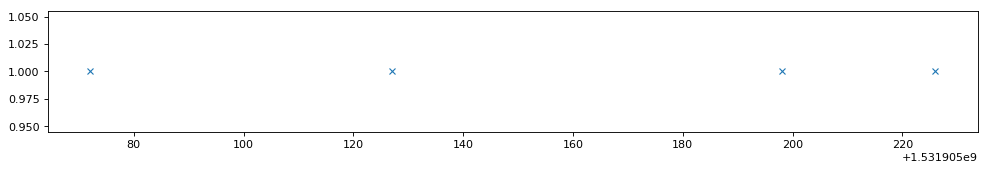

In [18]:
import matplotlib.pyplot as plt

for i in range(7):
    vehicle = 213 + i
    vehicleInfo = trains.loc[trains['vehicle_id'] == vehicle]
    plt.figure(num=None, figsize=(15, 2), dpi=80, facecolor='w', edgecolor='k')

    ar = vehicleInfo.timestamp
    plt.plot(ar, len(ar) * [1], 'x')
    plt.show()

    # This plot shows the distribution of GPS updates over time for each train. 
    # We need to do this with a larger sample size to understand whether or not GPS updates are regular
    # Perhaps somebody could calculate the average and std dev of time between GPS updates for all trains

In [6]:
import folium
train_map = folium.Map()
vehicles = []
for train in trains.id:
    vehicles.append({'loc': [trains.lat[train - 1], trains.lon[train - 1]], 'label': 'Train'})
    
for point in vehicles:
    marker = folium.Marker(location=point['loc'], popup=point['label'])
    marker.add_to(train_map)

train_map

In [26]:
import pandas as pd
stop_times = pd.read_csv('stop_times.csv')
stop_ids = stop_times.stop_id.tolist()
line_ids = list(map(lambda x: str(x)[0:3], stop_ids))
station_ids = list(map(lambda x: str(x)[3:5], stop_ids))
line_id = pd.DataFrame({"line_id": line_ids})
station_id = pd.DataFrame({"station_id": station_ids})
df = pd.concat([stops, line_id], axis=1)
df = pd.concat([df, station_id], axis=1)
print(df[['trip_id', 'arrival_time', 'stop_id', 'line_id', 'station_id']].head())
    

    trip_id arrival_time  stop_id line_id station_id
0  46523721     25:42:00    80122     801         22
1  46523721     25:45:00    80121     801         21
2  46523721     25:49:00    80123     801         23
3  46523721     25:51:00    80124     801         24
4  46523721     25:53:00    80125     801         25


In [39]:
stops = pd.read_csv('stops.txt')
#print(stops[['stop_id', 'stop_lat', 'stop_lon']].head())
df['stop_id'] = df['stop_id'].apply(str)
merged = df.merge(stops, how = 'inner', on = 'stop_id')
print(merged[['line_id', 'station_id', 'arrival_time', 'stop_lat', 'stop_lon']][0:100])

# This collects latitudes and longitudes of every point along the train schedule

   line_id station_id arrival_time  stop_lat    stop_lon
0      801         22     25:42:00  34.04861 -118.258822
1      801         22     23:22:00  34.04861 -118.258822
2      801         22     23:12:00  34.04861 -118.258822
3      801         22     23:10:00  34.04861 -118.258822
4      801         22     05:37:00  34.04861 -118.258822
5      801         22     06:55:00  34.04861 -118.258822
6      801         22     05:55:00  34.04861 -118.258822
7      801         22     06:31:00  34.04861 -118.258822
8      801         22     06:43:00  34.04861 -118.258822
9      801         22     07:07:00  34.04861 -118.258822
10     801         22     07:19:00  34.04861 -118.258822
11     801         22     07:31:00  34.04861 -118.258822
12     801         22     07:43:00  34.04861 -118.258822
13     801         22     07:55:00  34.04861 -118.258822
14     801         22     08:43:00  34.04861 -118.258822
15     801         22     08:31:00  34.04861 -118.258822
16     801         22     08:07